<a href="https://colab.research.google.com/github/D-Beall/MachineLearning/blob/master/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1 Linear Regression

## Setup and data visualization.

In [ ]:
from sklearn.model_selection import train_test_split #Train and test split library
import matplotlib
import matplotlib.pyplot as plt #Plotting Library
import numpy as np #Data manipulation/linear algebra
import pandas as pd #To read in data.

In [ ]:
housing = pd.read_csv('./drive/My Drive/Machine Learning/Project 2/kc_house_data.csv')

In [ ]:
idData = housing[['id','date']].copy()

In [ ]:
housing = housing.drop(['id','date'],axis=1)

In [ ]:
features = list(housing.columns)

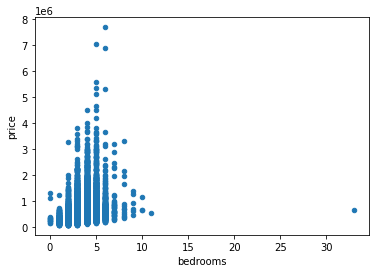

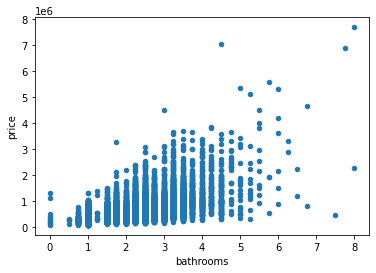

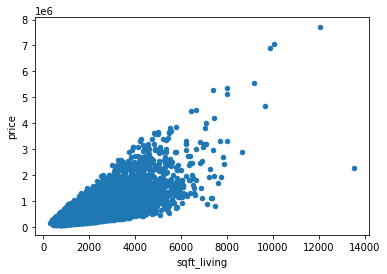

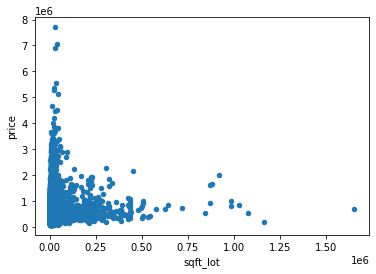

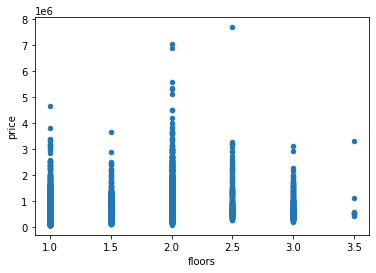

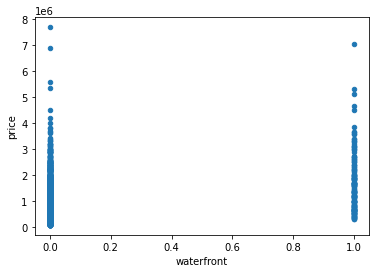

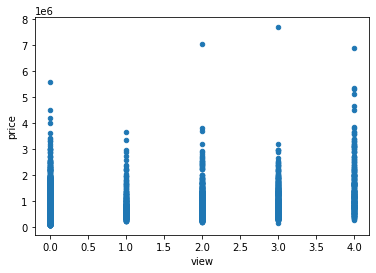

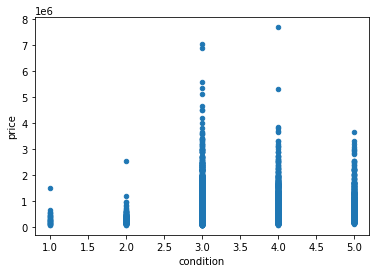

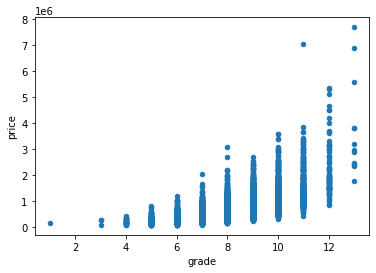

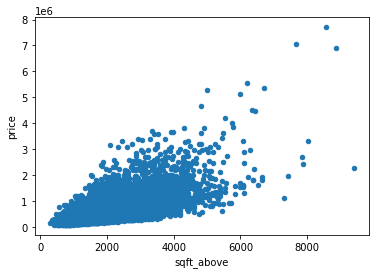

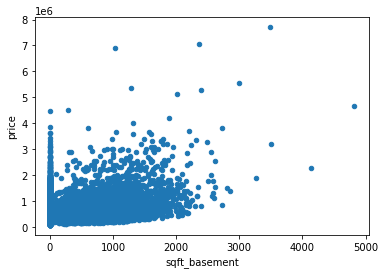

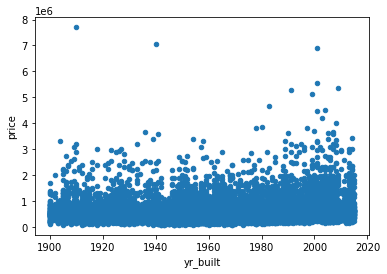

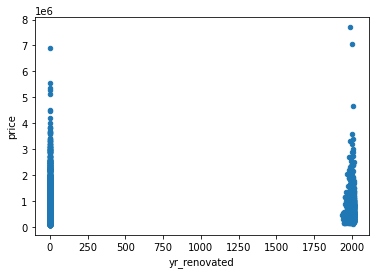

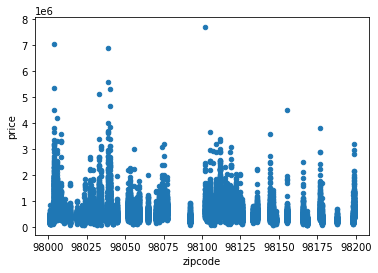

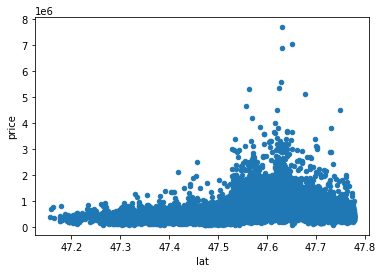

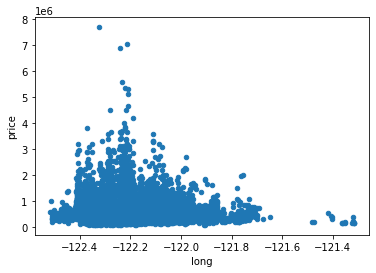

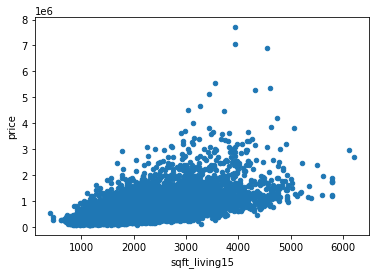

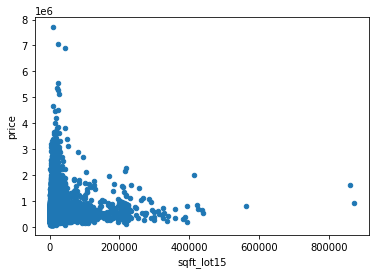

In [ ]:
for i in features:
  if i == 'price':
    continue
  housing.plot(x=i,y='price',kind='scatter')

## Feature selection

The feature of sqrft_living will be the feature selected because it appears to have the most linear distribution along with being denser than other features that are somewhat linear.

## Algorithm Creation

The cost function for this implementation of linear regression was OLS. OLS seemed appropriate for this data as it isn't extremely large nor complex. Additionally, the amount of outliers isn't too large so OLS is still viable.

As for the gradient descent, batch or first-order gradient descent was chosen. The main reason for this is because the data set isn't too large and other gradient descent methods like stochastic are unnecessary for this dataset. Parallelization isn't necessary for example.

In [ ]:
x = housing['sqft_living'].to_numpy()
y = housing['price'].to_numpy()

In [ ]:
def cost(x,y,w):
  '''
  cost OLS
  returns error which is the same thing as weight??????
  '''
  res = 0 
  for i in range(0,len(x)):
    res += (x[i]*w-y[i])**2
  w = res

  return w

In [ ]:
def gd(x,y):
  '''
  Gradient Descent
  1st order
  x- independent variables
  y- dependent variables
  w- weight
  b- intercept?
  lr- learning rate
  '''

  lr = 1/x[0] #set learning rate
  w = 0.1 #set weight?????
  b = 0 #set intercept????

  err = cost(x,y,w) #get initial error
  w2 = w*lr

  err2 = cost(x,y,w2)#get next error
  #loop until converges???
  while err-err2 > 0.0000001:#????
    w = w2
    w2 = w*lr
    err = err2
    err2 = cost(x,y,w2)

  return [w,b]


In [ ]:
def lr(x,y):
  '''
  Linear regression on x,y.
  Returns a weight? and intercept?
  '''
  res = gd(x,y)
  return res

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=40)
results = lr(x_train,y_train)
print(results)

[0.1, 0]


In [ ]:
m = results[0]
b = results[0]
for i in range(0,len(x_test)):
  pred_y = x[i]*m + b
  actual_y = y_test[i]
  print(str(pred_y) + ":::" + str(actual_y))

Streaming output truncated to the last 5000 lines.
151.1:::395000.0
129.1:::434500.0
157.1:::1945000.0
193.1:::320000.0
284.1:::395000.0
155.1:::340000.0
83.4:::330000.0
299.1:::645000.0
200.1:::800000.0
239.1:::440000.0
291.1:::413000.0
208.6:::720000.0
220.1:::500000.0
186.1:::320000.0
607.1:::970000.0
95.1:::237100.0
160.1:::562000.0
225.1:::533000.0
228.1:::649800.0
94.1:::260000.0
153.1:::405100.0
219.1:::353000.0
235.1:::450000.0
144.1:::515000.0
220.1:::364950.0
229.1:::628990.0
404.1:::397500.0
261.1:::425000.0
149.1:::340000.0
245.1:::850000.0
171.1:::475000.0
487.1:::546940.0
313.1:::340000.0
127.1:::610000.0
212.1:::670000.0
167.1:::1475000.0
207.1:::765000.0
142.1:::426000.0
125.1:::524950.0
94.1:::549995.0
192.1:::474950.0
354.6:::358000.0
126.1:::329000.0
234.1:::390000.0
259.1:::315000.0
397.1:::590000.0
122.1:::370228.0
140.1:::615000.0
236.1:::320000.0
187.1:::815000.0
283.1:::320000.0
226.1:::436110.0
197.1:::285000.0
314.1:::447000.0
124.1:::264000.0
345.1:::471000.0

#2 Decision Tree

2.1 ID3

Consider the following set of training examples for the unknown target function<X1,X2>→Y.

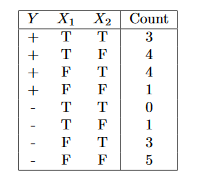

**1. What is the sample entropy H(Y) for this training data (with logarithms base 2)?**

Number of positives = 12
Number of negatives = 9

H(Y) = -(4/7)(log(4/7) - (3/7)log(3/7)
  = -(4/7)(-0.807) - (3/7)(-1.222)
  = 0.985


**2. What are the information gains IG(X1) = H(Y) - H(Y|X1) and IG(X2) = H(Y) - H(Y|X2) for this sample of training data?**

H(Y) = 0.985

S = [12+,9-]

S(X1T) = [7+,1-]

S(X1F) = [5+,8-]


IG(X1) = H(Y) - H(Y|X1)
       = 0.985 - ((8/21)Entropy(X1T) + (13/21)Entropy(X1F))

Entropy(X1T) = -((7/8)log2(7/8) + (1/8)log2(1/8)) = 0.544

Entropy(X1F) = -((5/13)log2(5/13) + (8/13)log2(8/13)) = 0.961

IG(X1) = 0.985 - ((8/21)0.544 + (13/21)0.961)

IG(X1) = 0.985 - (0.207 + 0.595) = 0.183




S(X2T) = [7+,3-]

S(X2F) = [5+,6-]

IG(X2) = H(Y) - H(Y|X2) = 0.985 - ((10/21)Entropy(X2T) + (11/21)Entropy(X2F))

Entropy(X2T) = -((7/10)log2(7/10)+(3/10)log2(3/10)) = 0.881

Entropy(X2F) = -((5/11)log2(5/11) + (6/11)log2(6/11)) = 0.994

IG(X2) = 0.985 - ((10/21)(0.881) + (11/21)(0.994))

IG(X2) = 0.985 - (0.420 + 0.520) = 0.045

**3 Draw the decision that would be learned by ID3(without postpruning) from this sample of training data.**

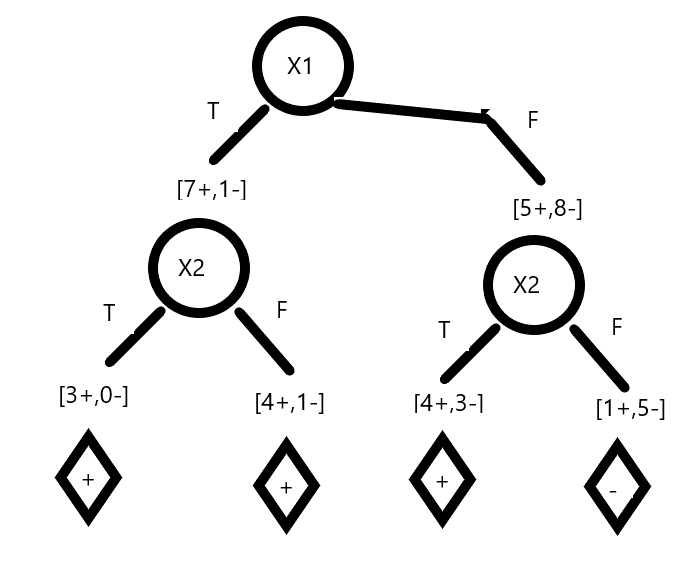

#3 Perceptron(see ofther notebook)

# 4 Support Vector Machine

## Libraries and file io

In [1]:
from sklearn.model_selection import train_test_split #Train and test split library
import matplotlib
import matplotlib.pyplot as plt #Plotting Library
import numpy as np #Data manipulation/linear algebra
import pandas as pd #To read in data.

In [2]:
bc = pd.read_csv('./drive/My Drive/Machine Learning/Project 2/bcw.csv')

In [3]:
bc.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Data Preprocessing

Changed the char value of diagnossis to int value for easier visualization. No feature scaling was done manually, that was most likely done withing the SVM library using the sklearn preprocessing library.

In [4]:
#Change diagnosis column to be 1 = Malignant and 0 = Benign 
bc['diagnosis'] = bc['diagnosis'].apply(lambda i: 1 if i=='M' else 0)


In [5]:
bc.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Visualize Data

Below is the data in question visualized with bar plots. Most of the data appears to be somewhat bell shaped which is to be expected for this type of dataset.

In [13]:
bc_features = list(bc.columns)
x_features = list(bc.columns)
x_features = x_features[2:]

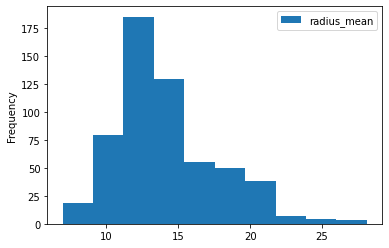

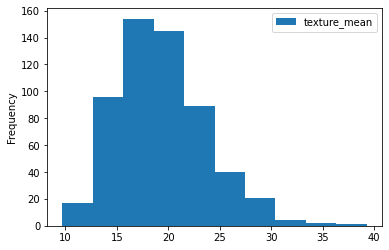

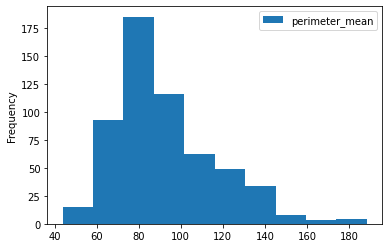

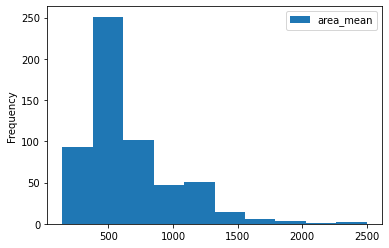

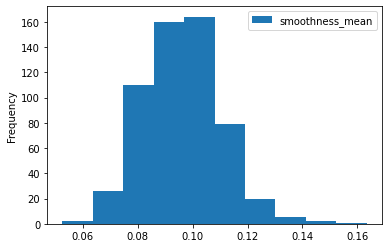

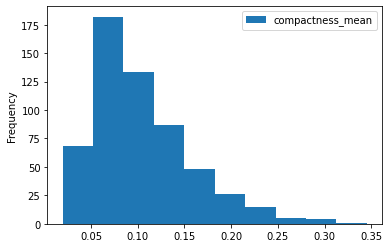

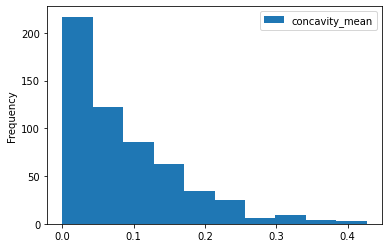

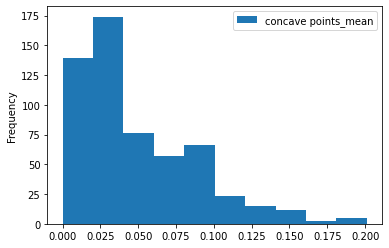

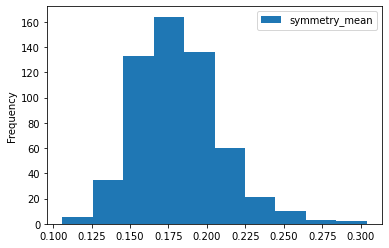

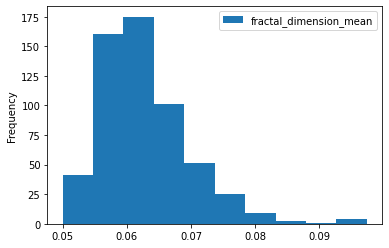

In [7]:
for i in range(2,12):
  bc.plot(y=bc_features[i],kind='hist')  

## Algorithm and results

In [49]:
y = bc["diagnosis"]
x = bc[x_features]

In [50]:
y = y.to_numpy()
x = x.to_numpy()

In [53]:
def get_results(p,t):
  '''
  Prints results of the svm.
  Takes a predicted(p) and test(p) array.
  '''
  correct = 0
  incorrect = 0
  fp = 0
  fn = 0
  tp = 0
  tn = 0
  for z in range(0,len(y_pred)):
    pred = y_pred[z]
    actual = y_test[z]
    if pred==1 and actual==1:
      tp+=1
    elif pred==0 and actual==0:
      tn+=1
    elif pred==1 and actual==0:
      fp+=1
    else:
      fn+=1
  incorrect = fp + fn
  correct = tp + tn
  total = incorrect + correct
  accuracy = correct/total
  return [incorrect, correct, total, tp, tn, fp, fn, accuracy]




The test size will be set to 10 percent of the data set. Through some runs in not included in the notebook it appears that a range between 0.05 and 0.15 provide the best accuracy.

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state=40) #split into train test

In [94]:
print(len(x_train))
print(len(x_test))

512
57


In [43]:
from sklearn import svm
clf = svm.SVC(C=100.0)
clf.fit(x_train,y_train)#fit model.

SVC(C=100.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [44]:
y_pred = clf.predict(x_test) #predict y values.

In [54]:
 res = get_results(y_pred,y_test)
 print(res)

[4, 82, 86, 29, 53, 1, 3, 0.9534883720930233]


In [88]:
#find best kernel type and c
import timeit
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
c = 0.0001
while c < 1000:
  print("***C: " + str(c) + "***")
  for k in kernels:
    st = timeit.default_timer()
    clf = svm.SVC(C=c,kernel=k)
    clf.fit(x_train,y_train)#fit model.
    diff = timeit.default_timer() - st
    y_pred = clf.predict(x_test) #predict y values.
    res = get_results(y_pred,y_test)
    acc = res[len(res)-1]
    print(k)
    print(acc)
    print(diff)
  c = c * 10

***C: 0.0001***
linear
0.9298245614035088
0.004992307000065921
poly
0.6842105263157895
0.011811334999947576
rbf
0.6666666666666666
0.016400132999478956
sigmoid
0.6666666666666666
0.01817432700045174
***C: 0.001***
linear
0.9298245614035088
0.007782886999848415
poly
0.8245614035087719
0.009010304999719665
rbf
0.6666666666666666
0.01583604200004629
sigmoid
0.6666666666666666
0.018295569000656542
***C: 0.01***
linear
0.9473684210526315
0.03282587500052614
poly
0.8771929824561403
0.007056526000269514
rbf
0.8596491228070176
0.01572636099990632
sigmoid
0.6666666666666666
0.017731461999574094
***C: 0.1***
linear
0.9473684210526315
0.3182238299996243
poly
0.9122807017543859
0.0051270220001242706
rbf
0.9122807017543859
0.010289272999216337
sigmoid
0.6666666666666666
0.01882842699978937
***C: 1.0***
linear
0.9649122807017544
1.2780906050002159
poly
0.9298245614035088
0.00486043300043093
rbf
0.9473684210526315
0.006912460999956238
sigmoid
0.40350877192982454
0.016469877999952587
***C: 10.0***
lin

It appears that the best accuracy is either 0.982 with 8+ second run time with a linear kernel. 

More practically, the rbf kernel acheived a 0.965 accuracy with a run time of less than 0.01 seconds. So for the offical results we will choose the rbf kernel with a c of 100.

In [89]:
st = timeit.default_timer()
clf = svm.SVC(C=100,kernel='rbf')
clf.fit(x_train,y_train)#fit model.
diff = timeit.default_timer() - st
y_pred = clf.predict(x_test) #predict y values.
res = get_results(y_pred,y_test)
acc = res[len(res)-1]

Results

Below are the results of the model based on the above training and test sets.

In [97]:
print("Incorrect: " + str(res[0]))
print("Correct: " + str(res[1]))
print("Total: " + str(res[2]))
print("True Positive: " + str(res[3]))
print("True Negative: " + str(res[4]))
print("False Positive: " + str(res[5]))
print("False Negative: " + str(res[6]))
print("Accuracy: " + str(res[7]))
print("Sensitivity: " + str(res[3]/(res[3]+res[6])))
print("Specificity: " + str(res[4]/(res[4]+res[5])))

Incorrect: 2
Correct: 55
Total: 57
True Positive: 18
True Negative: 37
False Positive: 1
False Negative: 1
Accuracy: 0.9649122807017544
Sensitivity: 0.9473684210526315
Specificity: 0.9736842105263158


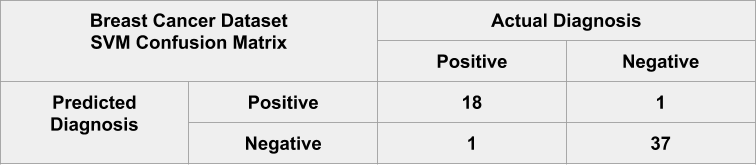

Runtime
(To fit and train model)

This model run effiecently especially compared to the linear kernel as discussed previously. This is mostly due to the efficency of the rbf kernel and other improvements from the sklearn library.

In [93]:
print("runtime in seconds: " + str(diff))

runtime in seconds: 0.011410873999921023
